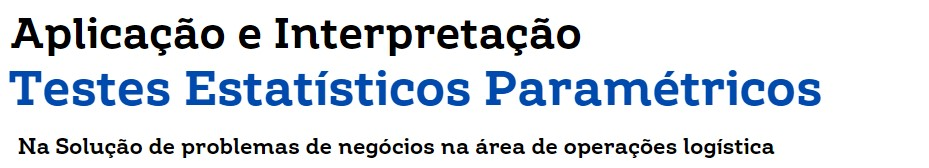

### Instalando e Carregando os Pacotes

In [1]:
# Imports
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_ind, levene, bartlett, f_oneway
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
# Vers√µes dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Marcus Lopes" 

Author: Marcus Lopes



### Problema de Neg√≥cio 01

**Compara√ß√£o de Efici√™ncia de Rotas de Transporte**

**Contexto:** Uma empresa de log√≠stica opera tr√™s rotas diferentes para transportar produtos perec√≠veis de um centro de distribui√ß√£o para v√°rios clientes. As rotas s√£o designadas como **Rota A, Rota B e Rota C**. A empresa deseja avaliar se h√° diferen√ßas significativas no tempo m√©dio de entrega entre essas tr√™s rotas, a fim de otimizar o planejamento de transporte e reduzir os custos operacionais.

Contextualiza√ß√£o:

* **Rota A:** Utilizada para entregar produtos em √°reas urbanas com alto tr√°fego.
* **Rota B:** Percorre √°reas suburbanas com estradas mais largas e menos congestionadas.
* **Rota C:** Direcionada para √°reas rurais com estradas sinuosas e menos desenvolvidas.

**Objetivo:**

Determinar se existe uma diferen√ßa significativa no tempo m√©dio de entrega entre as tr√™s rotas, para que os tomadores de utilizem essas informa√ß√µes para melhorar o planejamento log√≠stico, ajustando recursos e tempos de entrega conforme necess√°rio.

**Import√¢ncia:**

Compreender esses efeitos √© fundamental para a empresa tomar decis√µes informadas, visando a redu√ß√£o dos custos operacionais ao identificar e promover rotas mais eficientes e a melhoria na satisfa√ß√£o do cliente ao garantir entregas mais r√°pidas e consistentes.


### 1 - O Teste que ser√° empregado

Analisando o problema de neg√≥cio, que envolve a compara√ß√£o de tr√™s ou mais grupos para verificar se pelo menos um difere dos demais, ser√° aplicado o **Teste F (ANOVA de Um Fator).**

* **O teste F** √© um procedimento estat√≠stico usado para comparar as m√©dias de tr√™s ou mais grupos para determinar se pelo menos um dos grupos difere significativamente dos outros em termos de sua m√©dia. 

### 1.1 - Formula√ß√£o das hip√≥teses do Teste F (ANOVA de Um Fator)

As hip√≥teses para este teste s√£o formuladas da seguinte maneira:

* **Hip√≥tese Nula (H0):** Todas as popula√ß√µes das quais as amostras foram retiradas t√™m a mesma m√©dia. Ou seja n√£o existe diferen√ßa significativas entre as m√©dias da rotas.
<br>

* **Hip√≥tese Alternativa (H1 ou Ha):** Pelo menos uma das m√©dias de popula√ß√£o √© diferente. Ou seja existe diferen√ßas significativas em pelo menos umas das m√©dias das rotas
<br>


* **O valor-p no Teste F (ANOVA de Um Fator)** ser√° utilizado para determinar se existe uma diferen√ßa estatisticamente significativaentre entre as m√©dias dessas amostras. A interpreta√ß√£o do valor-p depende do n√≠vel de signific√¢ncia escolhido para o teste, frequentemente representado por Œ± (alfa).

Os valores mais comuns para Œ± s√£o 0,05 (5%) ou 0,01 (1%).**No nosso caso estamos usando 0,05**

Interpreta√ß√£o do valor-p:

* **Se o valor-p ‚â§ Œ±:** H√° evid√™ncias estat√≠sticas suficientes para rejeitar a hip√≥tese nula. Pelo menos uma das m√©dias de popula√ß√£o tem uma diferen√ßas significativa.
<br>

* **Se o valor-p > Œ±:** N√£o h√° evid√™ncias estat√≠sticas suficientes para rejeitar a hip√≥tese nula. Todas as popula√ß√µes das quais as amostras foram retiradas t√™m a mesma m√©dia.

### 1.2 - Suposi√ß√µes que o Teste F (ANOVA de Um Fator) pressup√µe

Para verificar as suposi√ß√µes para o teste F (ANOVA de um fator), precisaremos considerar principalmente duas suposi√ß√µes: 

* **Normalidade dos res√≠duos**
* **Homogeneidade das vari√¢ncias entre os grupos**
<br>

1. **Normalidade dos Res√≠duos**\
A normalidade dos res√≠duos pode ser verificada usando o teste de Shapiro-Wilk. Contudo, para a ANOVA, o teste √© aplicado aos res√≠duos do modelo, **que s√£o as diferen√ßas entre os valores observados e os valores previstos (ajustados) pelo modelo.** Normalmente, isso exigiria a constru√ß√£o de um modelo ANOVA usando, por exemplo, statsmodels para acessar os res√≠duos diretamente. Por simplicidade e como n√£o constru√≠mos o modelo aqui, podemos verificar a normalidade dos grupos individualmente como uma aproxima√ß√£o inicial.
<br>

2. **Homogeneidade das Vari√¢ncias**\
A homogeneidade das vari√¢ncias (tamb√©m conhecida como homocedasticidade) entre os grupos pode ser verificada pelo **teste de Levene ou pelo teste de Bartlett**. O teste de Levene √© mais robusto para distribui√ß√µes que n√£o seguem a normalidade, enquanto o teste de Bartlett √© mais sens√≠vel a desvios da normalidade.

**Observa√ß√£o:** Para utilizarmos o **teste F (ANOVA de um fator)**, os dados das amostras devem atender a duas suposi√ß√µes: normalidade dos res√≠duos e homogeneidade das vari√¢ncias. Caso n√£o atendam a alguma dessas suposi√ß√µes, testes n√£o param√©tricos podem ser a melhor alternativa.

### 1.3- Carregando os Dados do Problema de Neg√≥cio

In [3]:
# carregando os daddos das rotas

dfrotas = pd.read_csv("C:\\Arquivos\\rotas09.csv",encoding = "ISO-8859-1")

In [4]:
# Configurando o data ser para mostrar n√∫meros inteiros sem casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Verificar as primeiras linhas do dataframe
dfrotas.head()

rota_A_horas_para_entrega  rota_B_horas_para_entrega  \
0                       9.23                       9.09   
1                       8.28                       9.23   
2                       8.69                       8.47   
3                       9.57                       7.81   
4                       9.31                       8.79   

   rota_C_horas_para_entrega  
0                       9.60  
1                       9.78  
2                       9.51  
3                       8.96  
4                      10.11

### 1.4 -  Calculando as suposi√ß√µes do Teste F (ANOVA de um fator)

* **Normalidade dos res√≠duos**
* **Homogeneidade das vari√¢ncias entre os grupos**

#### 1.4.1 - Calculando a normalidade dos res√≠duos

In [6]:
# Verificando a suposi√ß√£o de Normalidade dos Res√≠duos

media_rota_A = np.mean(dfrotas['rota_A_horas_para_entrega'])
media_rota_B = np.mean(dfrotas['rota_B_horas_para_entrega'])
media_rota_C = np.mean(dfrotas['rota_C_horas_para_entrega'])

# Adicionando as m√©dias ao DataFrame
dfrotas['media_rota_A'] = media_rota_A
dfrotas['media_rota_B'] = media_rota_B
dfrotas['media_rota_C'] = media_rota_C


In [7]:
dfrotas.head()

rota_A_horas_para_entrega  rota_B_horas_para_entrega  \
0                       9.23                       9.09   
1                       8.28                       9.23   
2                       8.69                       8.47   
3                       9.57                       7.81   
4                       9.31                       8.79   

   rota_C_horas_para_entrega  media_rota_A  media_rota_B  media_rota_C  
0                       9.60          8.31          8.83          9.92  
1                       9.78          8.31          8.83          9.92  
2                       9.51          8.31          8.83          9.92  
3                       8.96          8.31          8.83          9.92  
4                      10.11          8.31          8.83          9.92

In [8]:
# Calculando os res√≠duos
residuos_rota_A = dfrotas['rota_A_horas_para_entrega']-dfrotas['media_rota_A']
residuos_rota_B = dfrotas['rota_B_horas_para_entrega']-dfrotas['media_rota_B']
residuos_rota_C = dfrotas['rota_C_horas_para_entrega']-dfrotas['media_rota_C']

In [9]:
# Concatenando os res√≠duos
residuos = np.concatenate([residuos_rota_A, residuos_rota_B, residuos_rota_C])

In [10]:
# Testando a normalidade dos res√≠duos
_, p_valor_shapiro = shapiro(residuos)
print(f"Valor-p do teste de Shapiro-Wilk para os res√≠duos: {p_valor_shapiro:.3f}")

# Interpretando o resultado do teste de Shapiro-Wilk
if p_valor_shapiro > 0.05:
    print("Os res√≠duos seguem uma distribui√ß√£o normal.")
else:
    print("Os res√≠duos n√£o seguem uma distribui√ß√£o normal.")

Valor-p do teste de Shapiro-Wilk para os res√≠duos: 0.487
Os res√≠duos seguem uma distribui√ß√£o normal.


#### 1.4.2 - Calculando homogeneidade das vari√¢ncias entre os grupos¬∂

In [11]:
# Teste de Levene para homogeneidade das vari√¢ncias
_, p_levene = levene(dfrotas['rota_A_horas_para_entrega'], 
                     dfrotas['rota_B_horas_para_entrega'], 
                     dfrotas['rota_C_horas_para_entrega'])

# Teste de Bartlett para homogeneidade das vari√¢ncias
_, p_bartlett = bartlett(dfrotas['rota_A_horas_para_entrega'], 
                         dfrotas['rota_B_horas_para_entrega'], 
                         dfrotas['rota_C_horas_para_entrega'])

print(f"Valor-P de Levene: {p_levene:.3f}")
print(f"Valor-P de Bartlett: {p_bartlett:.3f}")

Valor-P de Levene: 0.266
Valor-P de Bartlett: 0.136


In [12]:
# Interpretando os resultados

nivel_significancia = 0.05

if p_levene > nivel_significancia:
    print("N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese de homogeneidade das vari√¢ncias (Levene).")
else:
    print("H√° evid√™ncias suficientes para rejeitar a hip√≥tese de homogeneidade das vari√¢ncias (Levene).")

if p_bartlett > nivel_significancia:
    print("N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese de homogeneidade das vari√¢ncias (Bartlett).")
else:
    print("H√° evid√™ncias suficientes para rejeitar a hip√≥tese de homogeneidade das vari√¢ncias (Bartlett).")

N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese de homogeneidade das vari√¢ncias (Levene).
N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese de homogeneidade das vari√¢ncias (Bartlett).


### 1.5 - Calculando o Teste F (ANOVA de um fator)

In [13]:
# Realizando ANOVA de um fator
f_stat, p_valor = f_oneway(dfrotas['rota_A_horas_para_entrega'], 
                     dfrotas['rota_B_horas_para_entrega'], 
                     dfrotas['rota_C_horas_para_entrega'])


In [14]:
print(f"Estat√≠stica F: {f_stat:.3f}")
print(f"Valor-P: {p_valor:.3f}")

Estat√≠stica F: 49.457
Valor-P: 0.000


In [15]:
# Interpretando o resultado

nivel_significancia = 0.05

if p_valor <= nivel_significancia:
    print("H√° evid√™ncias suficientes para rejeitar a hip√≥tese nula.Pelo menos uma das rotas tem uma diferen√ßa significativa no tempo m√©dio de entrega.")
else:
    print("N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula.N√£o h√° diferen√ßas significativas no tempo m√©dio de entrega entre as rotas.")

H√° evid√™ncias suficientes para rejeitar a hip√≥tese nula.Pelo menos uma das rotas tem uma diferen√ßa significativa no tempo m√©dio de entrega.


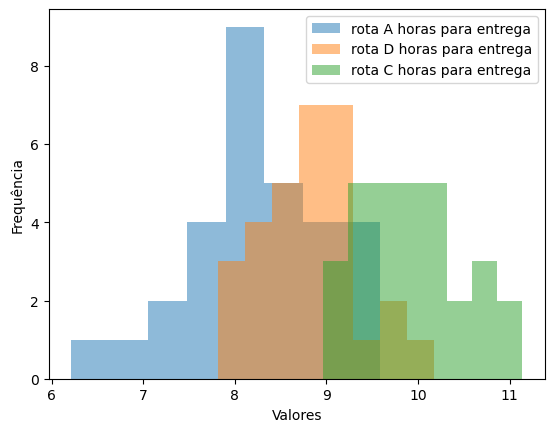

In [16]:
# Visualiza as distribui√ß√µes das amostras
plt.hist(dfrotas['rota_A_horas_para_entrega'], bins=8, alpha=0.5, label="rota A horas para entrega")
plt.hist(dfrotas['rota_B_horas_para_entrega'], bins=8, alpha=0.5, label="rota D horas para entrega")
plt.hist(dfrotas['rota_C_horas_para_entrega'], bins=8, alpha=0.5, label="rota C horas para entrega")
plt.xlabel("Valores")
plt.ylabel("Frequ√™ncia")
plt.legend()
plt.show()

 ### 1.6- Calculando a vari√¢ncia de cada grupo com ddof=1 para amostra

In [17]:

# Calculando a vari√¢ncia de cada grupo com ddof=1 para amostra
variancia_A = np.var(dfrotas['rota_A_horas_para_entrega'], ddof=1)
variancia_B = np.var(dfrotas['rota_B_horas_para_entrega'], ddof=1)
variancia_C = np.var(dfrotas['rota_C_horas_para_entrega'], ddof=1)

# Mostrando as vari√¢ncias
print(f"Vari√¢ncia da Rota A: {variancia_A:.2f}")
print(f"Vari√¢ncia da Rota B: {variancia_B:.2f}")
print(f"Vari√¢ncia da Rota C: {variancia_C:.2f}")

# Verificando qual grupo tem maior varia√ß√£o
max_variancia = max(variancia_A, variancia_B, variancia_C)
if max_variancia == variancia_A:
    print("A Rota A tem a maior varia√ß√£o.")
elif max_variancia == variancia_B:
    print("A Rota B tem a maior varia√ß√£o.")
else:
    print("A Rota C tem a maior varia√ß√£o.")


Vari√¢ncia da Rota A: 0.59
Vari√¢ncia da Rota B: 0.30
Vari√¢ncia da Rota C: 0.34
A Rota A tem a maior varia√ß√£o.


### 1.7 - Recomenda√ß√£o ao Tomador de Decis√£o

An√°lise de Varia√ß√£o das Rotas de Entrega

Ap√≥s realizar uma an√°lise detalhada das vari√¢ncias das horas para entrega em tr√™s rotas diferentes (A, B e C), obtivemos os seguintes resultados:
<br>

* Vari√¢ncia da Rota A: 0.59
* Vari√¢ncia da Rota B: 0.30
* Vari√¢ncia da Rota C: 0.34
<br>

A vari√¢ncia mede a dispers√£o dos tempos de entrega em rela√ß√£o √† m√©dia. Em outras palavras, quanto maior a vari√¢ncia, maior √© a inconsist√™ncia nos tempos de entrega dessa rota.

### 1.8- **Conclus√£o:**
<br>

A Rota A apresenta a maior varia√ß√£o (0.59), o que indica que provavelmente h√° uma maior inconsist√™ncia nos tempos de entrega quando comparado com as rotas A e B. Esta alta varia√ß√£o pode causar inefici√™ncias operacionais e insatisfa√ß√£o do cliente devido √† imprevisibilidade das entregas.

### 1.8.1- **Recomenda√ß√µes:**

Investiga√ß√£o Detalhada: 

* Realizar uma an√°lise mais aprofundada para identificar as causas da alta varia√ß√£o na Rota A. Isso pode incluir fatores como condi√ß√µes de tr√°fego, desempenho do motorista, e efici√™ncia do processo de carga e descarga.
<br>

### 1.8.2- **A√ß√µes Corretivas:**
<br>

* Implementar medidas para reduzir a variabilidade. Isso pode envolver a otimiza√ß√£o das rotas, treinamento adicional para os motoristas, ou melhorias nos procedimentos de log√≠stica.
<br>

* Monitoramento Cont√≠nuo: Estabelecer um sistema de monitoramento cont√≠nuo para acompanhar as varia√ß√µes nas rotas e garantir que as a√ß√µes corretivas estejam surtindo efeito.



**__________________________________________________________________________________________________**

### Problema de Neg√≥cio 02


**Contexto:** Uma empresa de log√≠stica est√° tentando melhorar a efici√™ncia no processo de picking (separa√ß√£o de pedidos) em seus centros de distribui√ß√£o. Eles t√™m dois fatores principais que acreditam impactar a acuracidade na separa√ß√£o de pedidos: o tipo de treinamento recebido pelos funcion√°rios e o n√≠vel de intensidade do treinamento. A empresa implementou dois tipos de treinamento (A e B) e tr√™s n√≠veis de intensidade (Baixo, M√©dio e Alto).

**Objetivo:**

O objetivo √© identificar como o tipo de treinamento e o n√≠vel de intensidade impactam a acuracidade no picking e se existe uma intera√ß√£o significativa entre esses fatores. Compreender essas rela√ß√µes ajudar√° a empresa a otimizar seus processos de treinamento e gerenciamento de intensidade para melhorar a acuracidade no picking, reduzir erros e aumentar a efici√™ncia operacional.


**Import√¢ncia:**

Redu√ß√£o de Erros e Melhoria na Efici√™ncia: Melhorar a acuracidade de picking pode reduzir o n√∫mero de erros nas separa√ß√µes de pedidos, o que por sua vez diminui os custos associados a corre√ß√µes e retrabalho.

Otimiza√ß√£o de Treinamentos: Entender qual tipo de treinamento √© mais eficaz e como o n√≠vel de intensidade influencia a acuracidade ajudar√° a empresa a desenhar programas de treinamento mais eficazes.

Gerenciamento de Intensidade: Ajustar os n√≠veis de intensidade pode otimizar a produtividade sem comprometer a acuracidade, evitando sobrecarga ou falta de desafios.

Satisfa√ß√£o do Cliente: Melhorar a acuracidade no picking contribui para entregas mais precisas e dentro dos prazos, aumentando a satisfa√ß√£o do cliente.


### 1. O Teste que ser√° empregado

Analisando o problema de neg√≥cio, que envolve a influ√™ncia de dois fatores (vari√°veis independentes) diferentes sobre uma vari√°vel dependente, √© poss√≠vel estudar simultaneamente os efeitos principais de cada um dos dois fatores, bem como a poss√≠vel intera√ß√£o entre eles sobre a vari√°vel dependente. O teste que ser√° empregado ser√° a ANOVA de 2 Fatores.

### 1.1- Formula√ß√£o das hip√≥teses da ANOVA de 2 Fatores

Ao realizar a ANOVA de dois fatores, verificamos se cada um desses fatores, bem como sua intera√ß√£o, afetam significativamente a vari√°vel de resposta.

**Para o fator A:**

* ùêª0 : N√£o h√° diferen√ßa significativa entre os n√≠veis do fator A.
* ùêª1:  H√° pelo menos uma diferen√ßa significativa entre os n√≠veis do fator A.

**Para o fator B:**

* ùêª0 : N√£o h√° diferen√ßa significativa entre os n√≠veis do fator B.
* ùêª1 : H√° pelo menos uma diferen√ßa significativa entre os n√≠veis do fator B.

**Para a intera√ß√£o entre A e B:**

* ùêª0 : N√£o h√° intera√ß√£o significativa entre os fatores A e B.
* ùêª1 : H√° uma intera√ß√£o significativa entre os fatores A e B.

### 1.2- Formula√ß√£o das Suposi√ß√µes da ANOVA de 2 Fatores

As suposi√ß√µes para a realiza√ß√£o desse teste s√£o:

**Independ√™ncia das observa√ß√µes:** Os dados devem ser independentes, ou seja, a medida de uma observa√ß√£o n√£o deve influenciar a medida de outra observa√ß√£o. Isso geralmente √© garantido pelo desenho experimental.

**Normalidade:** As distribui√ß√µes dos res√≠duos (erros) para cada combina√ß√£o de n√≠veis dos fatores devem ser aproximadamente normais. Isso pode ser verificado usando gr√°ficos de probabilidade normal ou testes de normalidade, como o teste de Shapiro-Wilk.

**Homogeneidade de vari√¢ncias:** As vari√¢ncias dos res√≠duos para cada combina√ß√£o de n√≠veis dos fatores devem ser iguais. Isso pode ser verificado usando o teste de Levene ou o teste de Bartlett.

√â importante verificar essas suposi√ß√µes ao realizar o teste ANOVA de 2 fatores para garantir a validade dos resultados. Caso alguma das suposi√ß√µes n√£o seja atendida, pode ser necess√°rio transformar os dados ou utilizar m√©todos alternativos de an√°lise.

### 1.3- Carregando os Dados do Problema de Neg√≥cio

In [18]:
# Definir par√¢metros para gera√ß√£o de dados
 
dados = pd.DataFrame({
    'Acerto_Picking': [90, 80, 95, 82, 82.3, 72.5, 62.8, 53.0, 52.4, 92.6, 92.9, 93.1,
                    71.8, 72.0, 72.2, 82.5, 82.7, 82.9, 93.2, 63.5, 63.1, 63.3, 63.6, 63.8],
    'Treinamento': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
    'intensidade': ['Baixo', 'Baixo', 'Baixo', 'Baixo', 'Medio', 'Medio', 'Medio', 'Medio', 'Alto', 'Alto', 'Alto', 'Alto', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Medio', 'Medio', 'Medio', 'Medio', 'Alto', 'Alto', 'Alto', 'Alto']
})

In [19]:
dados.head()

Acerto_Picking Treinamento intensidade
0           90.00           A       Baixo
1           80.00           A       Baixo
2           95.00           A       Baixo
3           82.00           A       Baixo
4           82.30           A       Medio

### 1.4- Ajustando o modelo

In [20]:
# Ajustando o modelo
modelo = ols('Acerto_Picking ~ C(Treinamento) + C(intensidade) + C(Treinamento):C(intensidade)', data = dados).fit()

### 1.5- Calculando o Teste ANOVA

In [21]:
# Realizando a ANOVA
resultado_anova = sm.stats.anova_lm(modelo, typ = 2)

In [22]:
print(resultado_anova)

                                sum_sq    df     F  PR(>F)
C(Treinamento)                 1920.93  1.00 11.62    0.00
C(intensidade)                10257.73  2.00 31.03    0.00
C(Treinamento):C(intensidade)  1732.85  2.00  5.24    0.02
Residual                       3140.24 19.00   NaN     NaN


**Elementos da tabela ANOVA**

* **sum_sq:** Soma dos quadrados representa a variabilidade total atribu√≠da a cada fonte de varia√ß√£o.

* **df:** Graus de liberdade associados a cada fonte de varia√ß√£o.

* **F:** Estat√≠stica F, que √© a raz√£o entre a vari√¢ncia m√©dia devido a uma fonte de varia√ß√£o e a vari√¢ncia m√©dia residual (dentro dos grupos).

* **PR(>F):** Valor-p associado ao teste F, que indica a probabilidade de observar uma estat√≠stica F t√£o extrema quanto, ou mais do que, a estat√≠stica calculada, assumindo que a hip√≥tese nula √© verdadeira.


### 1.6- Interpreta√ß√£o dos Resultados

**Interpreta√ß√£o dos Resultados:**

### **C(Treinamento):**

**Soma dos Quadrados (sum_sq): 1920.93**\
A alta soma dos quadrados indica uma varia√ß√£o significativa nos acertos de picking devido ao tipo de treinamento. Isso mostra que as diferentes categorias de treinamento t√™m um impacto importante na efici√™ncia de processamento..

**df (Graus de Liberdade): 1.00**\
Como o fator "Treinamento" tem duas categorias, o grau de liberdade √© 1 (2 - 1). Isso √© t√≠pico para fatores com duas categorias e √© necess√°rio para calcular a estat√≠stica F.

**F (Estat√≠stica F): 11.62**\
Um valor de F de 11.62 indica que a variabilidade nos acertos de picking entre os diferentes tipos de treinamento √© muito maior do que a variabilidade dentro dos grupos. Isso sugere que o tipo de treinamento tem um efeito significativo na efici√™ncia de processamento.

**PR(>F) (P-Valor): 0.00**\
Valor-p: Muito abaixo do n√≠vel de signific√¢ncia comum de 0.05, indicando que √© extremamente improv√°vel observar essa estat√≠stica F sob a hip√≥tese nula de que treinamento n√£o afeta o acertos de picking. Isso leva √† rejei√ß√£o da hip√≥tese nula, confirmando que o tipo de treinamento tem um efeito significativo.

### **C(intensidade):**

**sum_sq (Soma dos Quadrados): 10257.73**\
A alta soma dos quadrados (10257.73) indica que a variabilidade na efici√™ncia nos acertos de picking entre os n√≠veis de intensidade (Baixo, M√©dio, Alto) √© significativa, mostrando que o n√≠vel de intensidade impacta consideravelmente a efici√™ncia.

**df (Graus de Liberdade): 2.00**\
Isso reflete que o fator intensidade tem tr√™s categorias, e a varia√ß√£o entre essas categorias √© medida por dois graus de liberdade.

**F (Estat√≠stica F): 31.03**\
Um valor de F de 31.03 sugere que as diferen√ßas na efici√™ncia nos acertos de picking entre os diferentes n√≠veis de intensidade s√£o muito maiores do que a variabilidade observada dentro de cada n√≠vel de intensidade. Isso indica que o fator intensidade tem um efeito muito forte na efici√™ncia dos acertos de picking.

**PR(>F) (P-Valor): 0.00**\
Valor-p: Muito abaixo do n√≠vel de signific√¢ncia comum de 0.05, indicando que √© extremamente improv√°vel observar essa estat√≠stica F sob a hip√≥tese nula de que intensidade n√£o afeta o acertos de picking. Isso leva √† rejei√ß√£o da hip√≥tese nula, confirmando que inetsidade de treinamento tem um efeito significativo.


### **C(Treinamento)(intensidade):**

**sum_sq (Soma dos Quadrados): 1732.85**\
A alta soma dos quadrados indica que a intera√ß√£o entre o tipo de treinamento e o n√≠vel de intensidade √© respons√°vel por uma quantidade substancial da varia√ß√£o na efici√™ncia acertos de picking. Em outras palavras, a combina√ß√£o desses fatores afeta significativamente o desempenho.

**df (Graus de Liberdade): 2.00**\
Reflete o n√∫mero de par√¢metros independentes que est√£o sendo avaliados para a intera√ß√£o. Com 2 graus de liberdade, estamos testando a influ√™ncia conjunta dos dois fatores.

**F (Estat√≠stica F): 5.24**\
Este valor sugere que a variabilidade explicada pela intera√ß√£o entre os fatores √© maior do que a variabilidade residual (n√£o explicada). Isso indica que a intera√ß√£o √© um fator importante na efici√™ncia de processamento.

**PR(>F) (P-Valor): 0.02**
O p-valor √© 0.02, que √© menor que o n√≠vel de signific√¢ncia comum (0.05). Isso sugere que a intera√ß√£o entre o tipo de treinamento e o n√≠vel de intensidade tem um efeito significativo na acertos de picking. A estat√≠stica F indica que a combina√ß√£o do treinamento e intensidade altera de forma significativa acertos de picking.

### **Residual:**

**sum_sq (Soma dos Quadrados): 3140.24**\
A quantidade de variabilidade n√£o explicada pelo modelo √© significativa. Isso sugere que, embora o modelo esteja capturando uma parte da variabilidade nos acertos de picking, ainda h√° uma quantidade consider√°vel de variabilidade que n√£o √© explicada pelos fatores considerados.

**df (Graus de Liberdade): 19.00**\
Indica a quantidade de observa√ß√µes dispon√≠veis para avaliar a variabilidade n√£o explicada ap√≥s considerar os fatores no modelo. Um n√∫mero menor de graus de liberdade pode sugerir que o modelo est√° ajustando bem os dados, mas tamb√©m pode significar que o modelo pode n√£o estar capturando todos os fatores importantes.

**Interpreta√ß√£o:** Os res√≠duos representam a variabilidade n√£o explicada pelos fatores e intera√ß√µes do modelo. Os graus de liberdade associados aos res√≠duos indicam a quantidade de variabilidade n√£o explicada pelo modelo atual.

**Conclus√£o:**
Os resultados da ANOVA indicam que tanto o tipo de treinamento quanto o n√≠vel de intensidade t√™m efeitos significativos na efici√™ncia nos acertos de picking, e h√° uma intera√ß√£o significativa entre esses dois fatores. Em resumo:

**Treinamento:** Tem um efeito significativo na efici√™ncia nos acertos de picking.\
**Intensidade:** Tem um efeito significativo na efici√™ncia nos acertos de picking.\
**Intera√ß√£o Treinamento x Intensidade:** A intera√ß√£o entre treinamento e intensidade tamb√©m √© significativa, sugerindo que a combina√ß√£o dos dois fatores afeta a efici√™ncia nos acertos de picking de maneira n√£o linear.

### 1.7- Validando as Suposi√ß√µes da ANOVA de 2 Fatores

In [23]:
# Res√≠duos do modelo
residuos = modelo.resid

In [24]:
# Verificando a normalidade dos res√≠duos
_, p_valor_shapiro = shapiro(residuos)
print(f'Valor-P do teste de Shapiro-Wilk: {p_valor_shapiro}')

Valor-P do teste de Shapiro-Wilk: 0.46071353554725647


O teste de Shapiro-Wilk foi utilizado para verificar a normalidade dos res√≠duos. O resultado do valor-p √© bastante alto, significando que n√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula de normalidade. Em outras palavras, com base nesse teste, voc√™ pode assumir que os res√≠duos seguem uma distribui√ß√£o normal, o que √© uma das suposi√ß√µes importantes para a validade do teste ANOVA.

Em geral, um valor-p maior que 0.05 no teste de Shapiro-Wilk indica que os res√≠duos podem ser considerados normalmente distribu√≠dos, enquanto um valor-p menor que 0.05 sugere que os res√≠duos podem n√£o ser normalmente distribu√≠dos, violando assim essa suposi√ß√£o da ANOVA. Em nosso caso, a suposi√ß√£o de normalidade foi atendida.

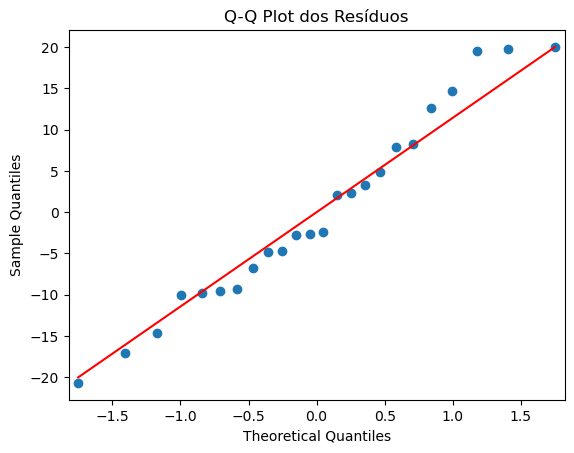

In [25]:
# Gr√°fico de probabilidade normal (Q-Q plot) dos res√≠duos
import matplotlib.pyplot as plt
sm.qqplot(residuos, line = 's')
plt.title('Q-Q Plot dos Res√≠duos')
plt.show()

In [26]:
# Verificando a homogeneidade das vari√¢ncias
_, p_valor_levene = levene(dados['Acerto_Picking'][dados['Treinamento'] == 'A'], 
                           dados['Acerto_Picking'][dados['Treinamento'] == 'B'])
print(f'Valor-p do teste de Levene: {p_valor_levene}')

Valor-p do teste de Levene: 0.7738486833140091


O teste de Levene foi utilizado para verificar a homogeneidade das vari√¢ncias, ou seja, se as vari√¢ncias dos res√≠duos s√£o iguais entre os grupos. Em nosso caso o valor-p do teste de Levene √© √© maior que o n√≠vel de signific√¢ncia de 0.05

Um valor-p maior que 0.05 geralmente indica que n√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula de igualdade das vari√¢ncias. Portanto, com base nesse teste, as vari√¢ncias dos res√≠duos s√£o homog√™neas entre os grupos, o que √© outra suposi√ß√£o atendida para a validade do teste ANOVA.

As conclus√µes da ANOVA podem ser usadas com seguran√ßa.



A defini√ß√£o de H0 e H1 em um teste estat√≠stico segue um princ√≠pio fundamental da metodologia cient√≠fica e estat√≠stica. A hip√≥tese nula geralmente representa a ideia de "n√£o h√° efeito" ou "n√£o h√° diferen√ßa", enquanto a hip√≥tese alternativa sugere que "h√° um efeito" ou "h√° uma diferen√ßa". Esta escolha n√£o √© arbitr√°ria, mas sim orientada pelo objetivo de prover uma afirma√ß√£o clara que possa ser testada objetivamente.

In [27]:
%reload_ext watermark
%watermark -a "Marcus lopesy"

Author: Marcus lopesy



## FIM